<a href="https://colab.research.google.com/github/VinothCruze/heuristic_approach/blob/main/Heuristic_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

Import dataset and join operation


In [2]:
track_df = pd.read_csv('28_tracks.csv')
trackmeta_df = pd.read_csv('28_tracksMeta.csv')

In [3]:
# filter the dataset only with bicycle and car
category = ["bicycle","car"]

trackmeta_filtered = trackmeta_df[(trackmeta_df["class"].isin(category))]
trackmeta_filtered.head()

,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class
0,28,0,0,356,357,0.00000,0.00000,bicycle
1,28,1,0,118,119,1.68473,3.61208,car
2,28,2,0,78,79,0.00000,0.00000,bicycle
3,28,3,0,10640,10641,1.98091,4.21349,car
4,28,4,0,10640,10641,1.93007,4.68720,car


In [4]:
trackmeta_filtered = trackmeta_filtered[['trackId','class']]
trackmeta_filtered.head()

,trackId,class
0,0,bicycle
1,1,car
2,2,bicycle
3,3,car
4,4,car


In [5]:
track_df = track_df.merge(trackmeta_filtered, on='trackId', how='left')

In [6]:
track_df = track_df[~track_df['class'].isna()]

In [7]:
track_df["distance"] = (track_df["xVelocity"]**(2) + track_df["yVelocity"]**(2))**(0.5)  

In [8]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646499 entries, 0 to 691974
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   recordingId      646499 non-null  int64  
 1   trackId          646499 non-null  int64  
 2   frame            646499 non-null  int64  
 3   trackLifetime    646499 non-null  int64  
 4   xCenter          646499 non-null  float64
 5   yCenter          646499 non-null  float64
 6   heading          646499 non-null  float64
 7   width            646499 non-null  float64
 8   length           646499 non-null  float64
 9   xVelocity        646499 non-null  float64
 10  yVelocity        646499 non-null  float64
 11  xAcceleration    646499 non-null  float64
 12  yAcceleration    646499 non-null  float64
 13  lonVelocity      646499 non-null  float64
 14  latVelocity      646499 non-null  float64
 15  lonAcceleration  646499 non-null  float64
 16  latAcceleration  646499 non-null  floa

check for correlation between bicycle and car using the track id and the frame each cross through

retreive list of cycle and car

In [9]:
bicycle_list = track_df[(track_df['class'] == "bicycle")].trackId
bicycle_list = list(set(bicycle_list))

car_list = track_df[(track_df['class'] == "car")].trackId
car_list = list(set(car_list))

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
675671   9175  43.09346 -21.75802
675672   9176  43.10476 -21.86804
675673   9177  43.11651 -21.97727
675674   9178  43.12869 -22.08575
675675   9179  43.14132 -22.19354
675676   9180  43.15444 -22.30061
675677   9181  43.16800 -22.40700
675678   9182  43.18208 -22.51270
675679   9183  43.19665 -22.61772
675680   9184  43.21171 -22.72219
675681   9185  43.22722 -22.82616
675682   9186  43.24316 -22.92967
675683   9187  43.25944 -23.03278
675684   9188  43.27645 -23.13548
675685   9189  43.29421 -23.23777
675686   9190  43.31273 -23.33986
675687   9191  43.33201 -23.44178
675688   9192  43.35201 -23.54352
675689   9193  43.37277 -23.64515
675690   9194  43.39433 -23.74664
675691   9195  43.41666 -23.84797
675692   9196  43.43963 -23.94916
675693   9197  43.46325 -24.05032
675694   9198  43.48750 -24.15133
675695   9199  43.51240 -24.25240
675696   9200  43.53795 -24.35356
675697   9201  43.56411 -24.45498
675698   9202  

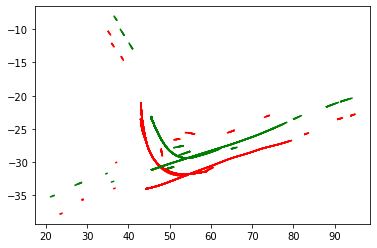

In [53]:
for car in car_list:
  frame_list = []
  trackcar_df = track_df[track_df.trackId == car]
  car_start_frame = min(trackcar_df['frame'])
  car_end_frame = max(trackcar_df['frame'])
  for cycle in bicycle_list:
    trackcycle_df = track_df[track_df.trackId == cycle]
    cycle_start_frame = min(trackcycle_df['frame'])
    cycle_end_frame = max(trackcycle_df['frame'])
    start_frame = max(car_start_frame, cycle_start_frame)
    end_frame = min(car_end_frame, cycle_end_frame)
    if (car_start_frame <= start_frame <= car_end_frame) & (car_end_frame <= end_frame <= car_end_frame):
      interaction_start_frame ,interaction_end_frame= start_frame,end_frame
    else:
      interaction_start_frame,interaction_end_frame = -1,-1
    if interaction_end_frame:
      car_interaction = track_df[(track_df.trackId == car) & (track_df.frame >= interaction_start_frame) & (track_df.frame <= interaction_end_frame)]
      cyc_interaction = track_df[(track_df.trackId == cycle) & (track_df.frame >= interaction_start_frame) & (track_df.frame <= interaction_end_frame)]
      interaction_frame = []
      for i in range(len(car_interaction)):
          vehicle_car = car_interaction.iloc[i]
          bicycle = cyc_interaction.iloc[i]
          car_x , car_y = int(vehicle_car["xCenter"]) , int(vehicle_car["yCenter"])
          cyc_x , cyc_y = int(bicycle["xCenter"]) , int(bicycle["yCenter"])
          # checking the correlation of car and cycle with the limit of 2 since it will null out by taking both the values same.
          if (car_x-2 <= cyc_x <= car_x+2) & (car_y-2 <= cyc_y <= car_y+2):
              if vehicle_car["distance"]:
                  interaction_frame.append(int(vehicle_car["frame"]))
                  if interaction_frame:
                    start_frame = interaction_frame[0]
                    end_frame = interaction_frame[-1]
                    car_df = track_df[(track_df.trackId == car) & (track_df.frame >= start_frame) & (track_df.frame <= end_frame)]
                    cyc_df = track_df[(track_df.trackId == cycle) & (track_df.frame >= start_frame) & (track_df.frame <= end_frame)]
                    plt.plot(car_df["xCenter"], car_df["yCenter"], color = 'green', label=car_df["frame"])
                    plt.plot(cyc_df["xCenter"], cyc_df["yCenter"], color = 'red', label=car_df["frame"])
                    print("start_frame:", start_frame,"end_frame:", end_frame)
                    print(car_df[["frame","xCenter", "yCenter"]])
                    print(cyc_df[["frame", "xCenter", "yCenter"]])
                   

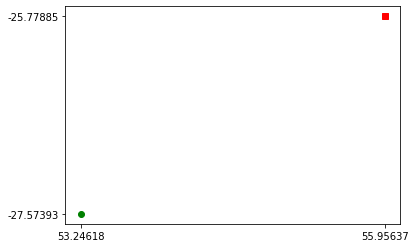

<Figure size 432x288 with 0 Axes>

In [48]:
# start_frame: 10643 end_frame: 10643
#          xCenter   yCenter
#   53.24618 -27.57393
#          xCenter   yCenter
#   55.95637 -25.77885


car_df = { 'frame': ['10643'],
        'xCenter': ['53.24618'],
        'yCenter': ['-27.57393']}


cyc_df = {'frame': ['10643'],
        'xCenter': ['55.95637'],
        'yCenter': ['-25.77885']}
  
# Create DataFrame
car_df = pd.DataFrame(car_df)
cyc_df = pd.DataFrame(cyc_df)


plt.plot(car_df["xCenter"], car_df["yCenter"], 'go-')
plt.plot(cyc_df["xCenter"], cyc_df["yCenter"], 'rs-')

fig = plt.figure()



plt.show()

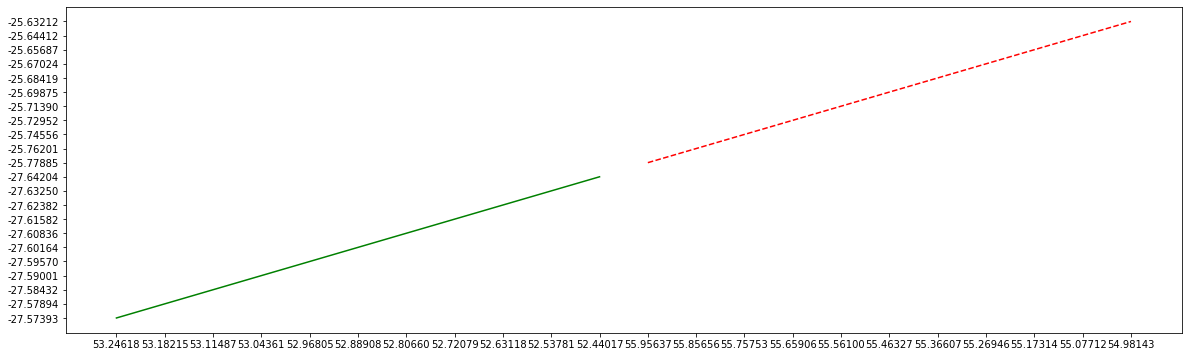

In [49]:
# start_frame: 10643 end_frame: 10653
#          xCenter   yCenter
# 689852  53.24618 -27.57393
# 689853  53.18215 -27.57894
# 689854  53.11487 -27.58432
# 689855  53.04361 -27.59001
# 689856  52.96805 -27.59570
# 689857  52.88908 -27.60164
# 689858  52.80660 -27.60836
# 689859  52.72079 -27.61582
# 689860  52.63118 -27.62382
# 689861  52.53781 -27.63250
# 689862  52.44017 -27.64204

#          xCenter   yCenter
# 690263  55.95637 -25.77885
# 690264  55.85656 -25.76201
# 690265  55.75753 -25.74556
# 690266  55.65906 -25.72952
# 690267  55.56100 -25.71390
# 690268  55.46327 -25.69875
# 690269  55.36607 -25.68419
# 690270  55.26946 -25.67024
# 690271  55.17314 -25.65687
# 690272  55.07712 -25.64412
# 690273  54.98143 -25.63212

car_df = {'xCenter': ['53.24618','53.18215','53.11487','53.04361','52.96805','52.88908','52.80660',
                      '52.72079','52.63118','52.53781','52.44017'],
        'yCenter': ['-27.57393','-27.57894','-27.58432','-27.59001','-27.59570','-27.60164','-27.60836',
                    '-27.61582','-27.62382','-27.63250','-27.64204']}


cyc_df = {'xCenter': ['55.95637','55.85656','55.75753','55.65906','55.56100','55.46327','55.36607',
                      '55.26946','55.17314','55.07712','54.98143'],
        'yCenter': ['-25.77885','-25.76201','-25.74556','-25.72952','-25.71390','-25.69875','-25.68419',
                    '-25.67024','-25.65687','-25.64412','-25.63212']}
  
# Create DataFrame
car_df = pd.DataFrame(car_df)
cyc_df = pd.DataFrame(cyc_df)

fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(car_df["xCenter"], car_df["yCenter"], color='green', linestyle='solid')
plt.plot(cyc_df["xCenter"], cyc_df["yCenter"], color='red', linestyle='dashed')



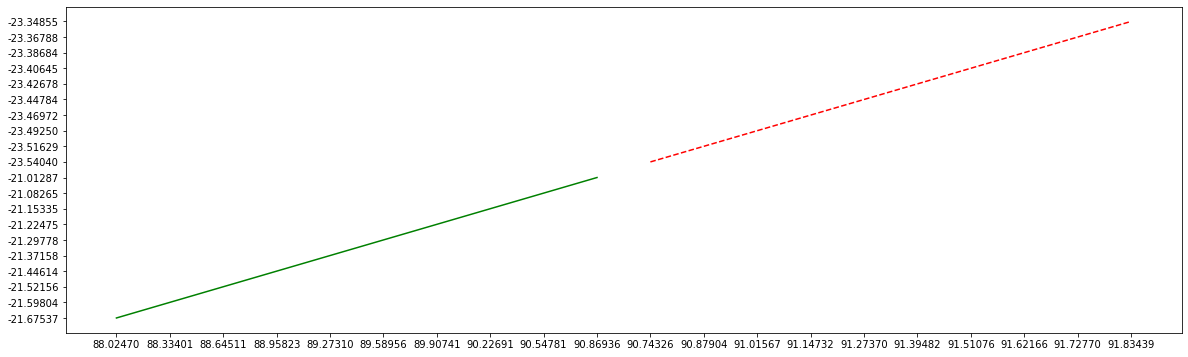

In [57]:
# start_frame: 9325 end_frame: 9334
#         frame   xCenter   yCenter
# 674286   9325  88.02470 -21.67537
# 674287   9326  88.33401 -21.59804
# 674288   9327  88.64511 -21.52156
# 674289   9328  88.95823 -21.44614
# 674290   9329  89.27310 -21.37158
# 674291   9330  89.58956 -21.29778
# 674292   9331  89.90741 -21.22475
# 674293   9332  90.22691 -21.15335
# 674294   9333  90.54781 -21.08265
# 674295   9334  90.86936 -21.01287
#         frame   xCenter   yCenter
# 673030   9325  90.74326 -23.54040
# 673031   9326  90.87904 -23.51629
# 673032   9327  91.01567 -23.49250
# 673033   9328  91.14732 -23.46972
# 673034   9329  91.27370 -23.44784
# 673035   9330  91.39482 -23.42678
# 673036   9331  91.51076 -23.40645
# 673037   9332  91.62166 -23.38684
# 673038   9333  91.72770 -23.36788
# 673039   9334  91.83439 -23.34855

car_df = {'xCenter': ['88.02470','88.33401','88.64511','88.95823','89.27310','89.58956','89.90741',
                      '90.22691','90.54781','90.86936'],
        'yCenter': ['-21.67537','-21.59804','-21.52156','-21.44614','-21.37158','-21.29778','-21.22475',
                    '-21.15335','-21.08265','-21.01287']}


cyc_df = {'xCenter': ['90.74326','90.87904','91.01567','91.14732','91.27370','91.39482','91.51076',
                      '91.62166','91.72770','91.83439'],
        'yCenter': ['-23.54040','-23.51629','-23.49250','-23.46972','-23.44784','-23.42678','-23.40645',
                    '-23.38684','-23.36788','-23.34855']}
  
# Create DataFrame
car_df = pd.DataFrame(car_df)
cyc_df = pd.DataFrame(cyc_df)

fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(car_df["xCenter"], car_df["yCenter"], color='green', linestyle='solid')
plt.plot(cyc_df["xCenter"], cyc_df["yCenter"], color='red', linestyle='dashed')
